In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
df.head().transpose()

,0,1,2,3,4
tau1,2.95906,9.3041,8.97171,0.716415,3.13411
tau2,3.07989,4.90252,8.84843,7.6696,7.60877
tau3,8.38103,3.04754,3.04648,4.48664,4.94376
tau4,9.78075,1.36936,1.21452,2.34056,9.85757
p1,3.76308,5.06781,3.40516,3.96379,3.52581
p2,-0.782604,-1.94006,-1.20746,-1.02747,-1.12553
p3,-1.25739,-1.87274,-1.27721,-1.93894,-1.84597
p4,-1.72309,-1.25501,-0.920492,-0.997374,-0.554305
g1,0.650456,0.413441,0.163041,0.446209,0.79711
g2,0.859578,0.862414,0.766689,0.976744,0.45545


In [4]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df = df.drop('stab', axis=1)

In [6]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [7]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [8]:
df_unstab = df[df['stabf']== 'unstable'].sample(3620)
df_stab = df[df['stabf']=='stable']
data_df= df_stab.append(df_unstab)
data_df 

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,stable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,stable
10,5.930110,6.730873,6.245138,0.533288,2.327092,-0.702501,-1.116920,-0.507671,0.239816,0.563110,0.164461,0.753701,stable
12,1.616787,2.939228,0.819791,4.191804,3.752282,-1.484885,-1.280581,-0.986816,0.899698,0.866546,0.303921,0.077610,stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,8.723931,2.447146,5.453310,3.948046,3.222521,-1.632545,-0.956788,-0.633188,0.830457,0.407462,0.603006,0.988075,unstable
2836,8.560696,3.022054,8.156982,7.758487,3.372537,-0.574802,-0.887459,-1.910276,0.982835,0.131136,0.377479,0.650131,unstable
9231,6.423073,3.012614,1.480152,6.299742,4.113345,-1.452437,-0.786838,-1.874070,0.233710,0.998986,0.421595,0.741616,unstable
8143,7.865923,3.781793,1.810704,4.258561,3.073474,-1.191169,-1.285819,-0.596485,0.800073,0.571636,0.443753,0.849979,unstable


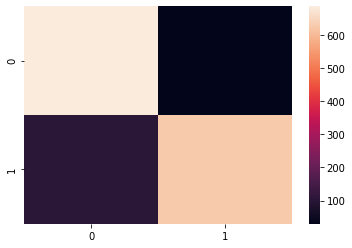

In [35]:
import seaborn as sns
sns.heatmap(cm)

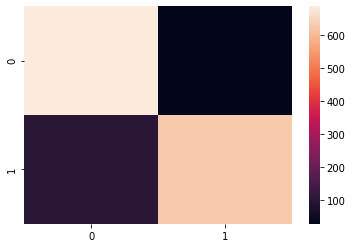

In [36]:
sns.heatmap(cm_1)

In [10]:
x = data_df.drop('stabf', axis=1)
y = data_df['stabf']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [14]:
x_normalized_train_df = scaler.fit_transform(x_train) 
x_normalized_test_df = scaler.fit_transform(x_test)

In [15]:
y_train.value_counts()

stable      2904
unstable    2888
Name: stabf, dtype: int64

In [16]:
x_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
4102,9.897265,3.637844,4.290065,8.607478,3.246692,-1.540617,-0.733605,-0.972470,0.514474,0.454052,0.888528,0.577343
3474,2.070262,8.889857,0.763238,3.996454,4.445607,-1.543882,-1.291089,-1.610636,0.712355,0.741182,0.259698,0.534352
3725,9.693446,1.066761,2.037479,6.998890,2.513678,-0.619724,-0.502285,-1.391670,0.873912,0.692020,0.629985,0.347777
8591,1.070637,2.745811,6.046178,5.416654,4.823958,-1.867970,-1.373601,-1.582387,0.817517,0.340912,0.521898,0.120164
8230,3.245934,8.360463,4.398206,9.632935,3.315526,-0.730478,-0.797694,-1.787354,0.540724,0.485303,0.232032,0.413867
...,...,...,...,...,...,...,...,...,...,...,...,...
2465,0.728186,1.780958,2.998783,7.238208,3.184408,-0.698908,-0.943495,-1.542005,0.194109,0.528008,0.501233,0.741934
2348,5.778626,2.809611,5.903978,9.844730,3.712160,-0.715264,-1.895437,-1.101458,0.102087,0.669321,0.666608,0.309198
3210,1.462759,7.783556,7.941150,5.681834,4.011562,-1.082559,-1.808980,-1.120023,0.208220,0.822709,0.750304,0.324480
635,1.994402,3.467408,5.691771,1.674242,4.485980,-1.897994,-1.104547,-1.483439,0.296390,0.715735,0.155575,0.183378


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [18]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_normalized_train_df, y_train)
y_pred = RFC.predict(x_normalized_test_df)
acc = accuracy_score(y_true=y_test,y_pred=RFC.predict(x_normalized_test_df))
print('Accuracy score using random forest: ', acc)

Accuracy score using random forest:  0.9081491712707183


In [19]:
cm = confusion_matrix(y_true=y_test, y_pred=RFC.predict(x_normalized_test_df))
print('Confusion matrix using random forest: ', cm)

Confusion matrix using random forest:  [[686  30]
 [103 629]]


In [20]:
pre = precision_score(y_true=y_test, y_pred=RFC.predict(x_normalized_test_df), pos_label='stable')
print('Precision score using random forest: ', pre)

Precision score using random forest:  0.8694550063371356


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(x_normalized_train_df, y_train) 
y_pred1 = ETC.predict(x_normalized_test_df)
acc1 = accuracy_score(y_true=y_test, y_pred=ETC.predict(x_normalized_test_df))
print('Accuracy score using Extra Tree Classifier: ', acc1)

Accuracy score using Extra Tree Classifier:  0.9095303867403315


In [22]:
cm_1 = confusion_matrix(y_true=y_test, y_pred=ETC.predict(x_normalized_test_df))
print('Confusion matrix using Extra Tree Classifier: ', cm_1)

Confusion matrix using Extra Tree Classifier:  [[687  29]
 [102 630]]


In [23]:
pre_1 = precision_score(y_true=y_test, y_pred=ETC.predict(x_normalized_test_df), pos_label='stable')
print('Precision score using Extra Tree Classifier: ', pre_1)

Precision score using Extra Tree Classifier:  0.870722433460076


# xgboost and lightgbm

In [24]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_normalized_train_df, y_train)
y_pred = XGB.predict(x_normalized_test_df)
xgb_score = accuracy_score(y_test, y_pred)
print('Accuracy score using XGBoost: ', xgb_score)
print('Accuracy score using XGBoost: ', round((xgb_score*100), 2))

Accuracy score using XGBoost:  0.9343922651933702
Accuracy score using XGBoost:  93.44


In [25]:
from lightgbm import LGBMClassifier
Lgb = LGBMClassifier()
Lgb.fit(x_normalized_train_df, y_train)
y_pred = Lgb.predict(x_normalized_test_df)
lgb_score = accuracy_score(y_test, y_pred)
print('Accuracy score using lightgbm: ', lgb_score)
print('Accuracy score using lightgbm: ', round((lgb_score*100), 2))

Accuracy score using lightgbm:  0.9261049723756906
Accuracy score using lightgbm:  92.61


In [34]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': [50, 100, 300, 500, 1000], 
         'min_samples_split' : [2, 3, 5, 7, 9], 
         'min_samples_leaf' : [1, 2, 4, 6, 8], 
         'max_features' : ['auto', 'sqrt', 'log2', None] 
        }
EX_search = RandomizedSearchCV(ExtraTreesClassifier(), param_grid, scoring='accuracy', cv = 5, n_iter=10, n_jobs=-1, verbose=1, random_state=1)
EX_search.fit(x_normalized_train_df, y_train)
EX_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.9s finished


{'n_estimators': 300,
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

In [27]:
ETC_best = ExtraTreesClassifier(n_estimators = 500, min_samples_split = 9, min_samples_leaf = 1, max_features = 'sqrt')
ETC_best.fit(x_normalized_train_df, y_train)
y_pred = ETC_best.predict(x_normalized_test_df)
ETC_best_score = accuracy_score(y_test, y_pred)
print('Accuracy score using ExtraTree with its best parameter: ', round((ETC_best_score*100), 2))

Accuracy score using ExtraTree with its best parameter:  92.2


In [33]:
ETC_best = ExtraTreesClassifier(n_estimators = 300, min_samples_split = 9, min_samples_leaf = 2, max_features = 'auto')
ETC_best.fit(x_normalized_train_df, y_train)
y_pred = ETC_best.predict(x_normalized_test_df)
ETC_best_score = accuracy_score(y_test, y_pred)
print('Accuracy score using ExtraTree with its best parameter: ', round((ETC_best_score*100), 2))

Accuracy score using ExtraTree with its best parameter:  92.4
